# Goal 1: Investigate overall correlation between quantitative and qualitative metrics.

1.2: Cluster the experiments in the 3 expected clusters (based on assigned labels) and compare the results obtained using QM space and HM space

**Experiments Scenarios**:
- "Passing"
- "Overtaking"
- "Crossing 1"
- "Crossing 2"
- "Advanced 1"
- "Advanced 2"
- "Advanced 3"
- "Advanced 4"

**Labels**:
- "Good"
- "Mid"
- "Bad"

**QM Metrics**
- [0] Time to Goal
- [1] Path length
- [2] Cumulative heading changes
- [3] Avg robot linear speed

- [4] Social Work 
- [5] Social Work (per second)
- [6] Average minimum distance to closest person
- [7] Proxemics: intimate space occupancy
- [8] Proxemics: personal space occupancy
- [9] Proxemics: social space occupancy
- [10] Proxemics: public space occupancy

**HM Metrics**
- [0] Unobtrusiveness
- [1] Friendliness
- [2] Smoothness
- [3] Avoidance Foresight

In [1]:
import yaml
import numpy as np
import os
from os.path import expanduser

**Take data from files**

In [2]:
home = expanduser("~")
# Load config params for experiments
config = yaml.safe_load(open('params.yaml'))['social_metrics_match']

lab_data_path = home + config['data']['repo_dir'] + config['data']['lab_data_path']
survey_data_path = home + config['data']['repo_dir'] + config['data']['survey_data_path']
results_dir = home + config['data']['results_path']
print("lab data path: ", lab_data_path)
print("survey data path: ", survey_data_path)
print("results dir path: ", results_dir)

lab data path:  /root/code_for_validation_stuff/social_metrics_match/data_folder/validation_of_metrics_quantitative_and_lab_qualitative.ods
survey data path:  /root/code_for_validation_stuff/social_metrics_match/data_folder/qualitative_metrics_survey.xlsx
results dir path:  /root/social_metrics_results


In [3]:
from utils.data_organization import organize_dict_lab_data, get_all_lab_data_arr, np_extract_exp_lab, np_single_lab_run
from utils.data_organization  import organize_dict_survey, weighted_avg_survey_data, get_robotics_knowledge, datacube_qual_survey_data

**LAB DATA**

In [8]:
dict_lab_data = organize_dict_lab_data(lab_data_path)

# Extract the np arrays of a specific experiments identified by its keys
passing_good_QM_array, passing_good_HM_array = np_single_lab_run(dict_lab_data, experiment='Passing', label='Good')
print(f"Passing single run QM shape:{passing_good_QM_array.shape}, passing single run HM shape: {passing_good_HM_array.shape}")
print(f"Passing good QM: {passing_good_QM_array},\nPassing good HM: {passing_good_HM_array}") 

# Extract the np arrays of a lab scenario (all the 3 runs with different labels), dividing QM and HM
passing_QM_array, passing_HM_array = np_extract_exp_lab(dict_lab_data, experiment='Advanced 4', order=False, normalize=True, normalization="rescale")
print(f"passing QM shape:{passing_QM_array.shape}, passing HM shape: {passing_HM_array.shape}")
# print(f"passing QM: {passing_QM_array},\npassing HM: {passing_HM_array}")

# Starting from the complete dataframe with lab data, Extract the np arrays of all lab scenarios dividing QM and HM
all_lab_QM_array, all_lab_HM_array = get_all_lab_data_arr(dict_lab_data, normalize=True, normalization="rescale")
print(f"All lab QM array: {all_lab_QM_array.shape}, All lab HM array: {all_lab_HM_array.shape}")
# print(f"All lab QM array: {all_lab_QM_array}, All lab HM array: {all_lab_HM_array}")

Passing single run QM shape:(9,), passing single run HM shape: (4,)
Passing good QM: [1994.32749455  181.71671853   10.2326076     4.55598068    2.37741413
    9.28961749   12.33411397   72.83372365    5.54254489],
Passing good HM: [0.8 0.8 0.8 1. ]
passing QM shape:(9, 3), passing HM shape: (4, 3)
All lab QM array: (24, 9), All lab HM array: (24, 4)


**SURVEY DATA**

In [ ]:
dict_survey_data = organize_dict_survey(survey_data_path)
robot_knowledge_array = get_robotics_knowledge(survey_data_path)

# To extract np arrays of all the survey data
survey_datacube = datacube_qual_survey_data(dict_survey_data, normalize=True)

# To directly extract the average and std: If Weighted average set w_avg=True (use robotics background knowledge as weights)
weighted_survey_array_avg, weighted_survey_array_std = weighted_avg_survey_data(dict_survey_data, robot_knowledge_array, w_avg=True,normalize=True)
print(f"survey weighted avg shape: {weighted_survey_array_avg.shape},\nsurvey weighted std shape:  {weighted_survey_array_std.shape}") 

survey weighted avg shape: (24, 4),
survey weighted std shape:  (24, 4)


# K-means clusters and 2D visualization with t-SNE

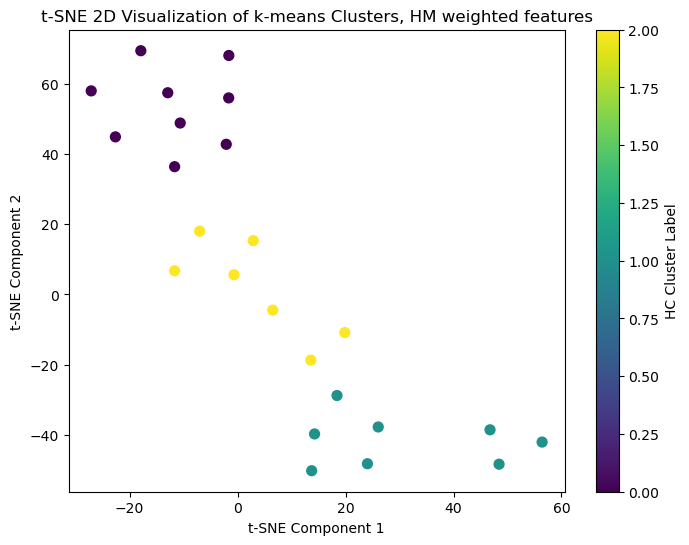

In [11]:
from utils.cluster_evaluation import cluster_K_means, run_TSNE
from utils.plot_utils import plot_tSNE_2D

p_value = 8
K = 3
n_dim = 2

# Process Survey data with robotics knowledge weights
clu_labels = cluster_K_means(weighted_survey_array_avg, K=K)
t_sne_results = run_TSNE(weighted_survey_array_avg, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM weighted')

# Process Survey data without robotics knowledge weights
# clu_labels = cluster_K_means(non_weighted_array, K=K)
# t_sne_results = run_TSNE(non_weighted_array, n=n_dim, p=p_value)
# plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM NOT weighted')

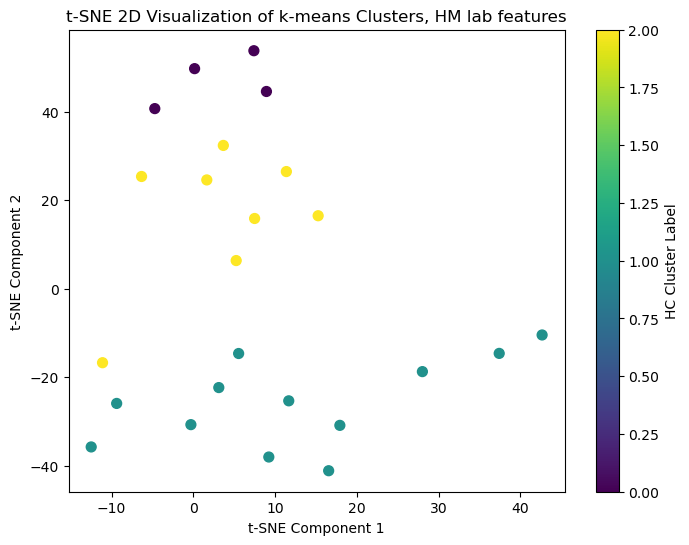

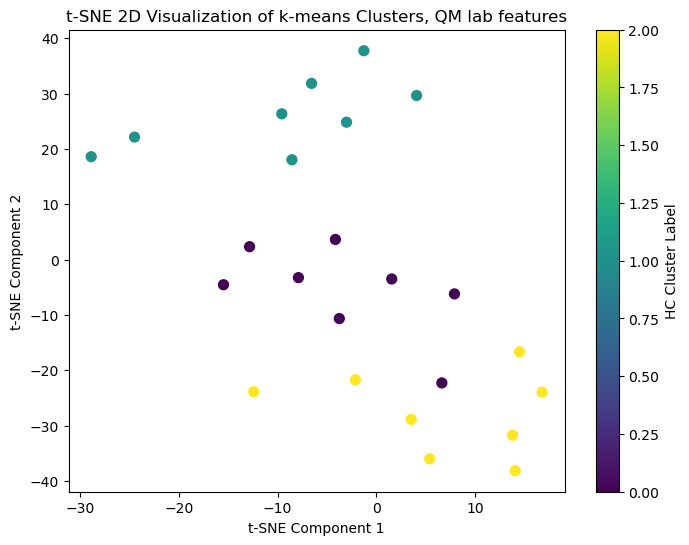

In [12]:
# Process Qualitative Lab data
clu_labels = cluster_K_means(all_lab_HM_array, K=K)
t_sne_results = run_TSNE(all_lab_HM_array, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM lab')

# Process Quantitative Lab data
clu_labels = cluster_K_means(all_lab_QM_array, K=K)
t_sne_results = run_TSNE(all_lab_QM_array, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='QM lab')